# Written Summer 2019. Refactored in summer 2021, damn my code was bad. 
> Whether you should buy above or below the SMA

This code has a mistake. `invPerMonth` is just that. my loop ignores left overmoney. ie 120-100 = 20, That $20 disappears

Note `df2 = dataset.iloc[ : :20, :] # every 20th, all columns`, this is on a (apx.) monthly basis, as there are (apx.) 20 trading days a month... use `consider_every_Nth_day`

In [1]:
consider_every_Nth_day = 1 # 20 
share = 'SPY'

In [2]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas_datareader import data as pdr
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2003-03-14,84.129997
2003-03-17,86.779999
2003-03-18,87.290001
2003-03-19,87.959999
2003-03-20,88.150002


In [4]:
df2 = dataset.iloc[ : :consider_every_Nth_day, :] # every 20th, all columns
df2.head()

,Close
Date,
2003-03-14,84.129997
2003-03-17,86.779999
2003-03-18,87.290001
2003-03-19,87.959999
2003-03-20,88.150002


In [5]:
invPerMonth = 1000
total =0
shares=0 

for i, row in df2.iterrows():
   # print("\n" + str(i) +" | "+ str(row.Close.round(2)))
    numShares = math.floor((invPerMonth)/row.Close.round(2))
    shares+=numShares
    invPerMonth -= (row.Close.round(2) * numShares)
    
    invPerMonth += 1000
   # print("numShares:" , numShares)
   # print("shares:" , shares)
   # print("invPerMonth:" , invPerMonth)

base_strategy = int(dataset.tail(1).Close*shares)
value_of_shares_at_end = dataset.tail(1).Close.values[0]*shares
print("invPerMonth: ",invPerMonth)
print(f"Numb of shares:{shares}")
print(f"Numb of shares * last closing = {value_of_shares_at_end:.2f}")

invPerMonth:  1143.1399999999935
Numb of shares:30010
Numb of shares * last closing = 12917204.08


In [6]:
# Note the odd usage
def simulate_buy_below_MA(window=1):
    df2['MA'] = df2.rolling(window=window).mean()
    
    invPerMonth = 1000
    total =0
    shares=0 
    for i, row in df2.iterrows():
       # print("\n" + str(i) +" | "+ str(row.Close.round(2)))
        if((row.Close.round(2) <= row.MA.round(2)) and not math.isnan(row.MA.round(2))):
          numb_new_shares = math.floor((invPerMonth)/row.Close.round(2))
          shares += numb_new_shares
          invPerMonth -= (row.Close.round(2) * numb_new_shares)
          #print("\n close: " + str(i) +" | "+ str(row.Close.round(2)))
          #print(" MA:    "+str(i) +" | "+ str(row.MA.round(2)))
        invPerMonth += 1000
       # print("numb_new_shares:" , numb_new_shares)
       # print("shares:" , shares)
       # print("invPerMonth:" , invPerMonth)
    value_of_shares_at_end = dataset.tail(1).Close.values[0]*shares
    print(f'Window size is {window}')
    print(f"InvPerMonth: {invPerMonth:.2f}")
    print(f"Numb of shares:{shares}")
    print(f"Numb of shares * last closing = {value_of_shares_at_end:.2f}")
    print(f"Total: {value_of_shares_at_end + invPerMonth:.2f}")
    print(f'Total with base_strategy: {base_strategy:.2f}')
    print(f'Improvement over base_strategy: {value_of_shares_at_end + invPerMonth - base_strategy:.2f}')
    print(f'===================================\n')

In [7]:
simulate_buy_below_MA(0)
simulate_buy_below_MA(1)
simulate_buy_below_MA(10)
simulate_buy_below_MA(20)
simulate_buy_below_MA(30)
simulate_buy_below_MA(45)
simulate_buy_below_MA(90)
simulate_buy_below_MA(180)
simulate_buy_below_MA(360)
simulate_buy_below_MA(720)

Window size is 0
InvPerMonth: 4609000.00
Numb of shares:0
Numb of shares * last closing = 0.00
Total: 4609000.00
Total with base_strategy: 12917204.00
Improvement over base_strategy: -8308204.00

Window size is 1
InvPerMonth: 1143.14
Numb of shares:30010
Numb of shares * last closing = 12917204.08
Total: 12918347.22
Total with base_strategy: 12917204.00
Improvement over base_strategy: 1143.22

Window size is 10
InvPerMonth: 9387.83
Numb of shares:30002
Numb of shares * last closing = 12913760.64
Total: 12923148.47
Total with base_strategy: 12917204.00
Improvement over base_strategy: 5944.47

Window size is 20
InvPerMonth: 9145.88
Numb of shares:29960
Numb of shares * last closing = 12895682.58
Total: 12904828.46
Total with base_strategy: 12917204.00
Improvement over base_strategy: -12375.54

Window size is 30
InvPerMonth: 10121.64
Numb of shares:29901
Numb of shares * last closing = 12870287.21
Total: 12880408.85
Total with base_strategy: 12917204.00
Improvement over base_strategy: -36

In [8]:
def simulate_buy_above_MA(window=1):
    df2['MA'] = df2.rolling(window=window).mean()
    
    invPerMonth = 1000
    total =0
    shares=0 
    for i, row in df2.iterrows():
       # print("\n" + str(i) +" | "+ str(row.Close.round(2)))
        if((row.Close.round(2) >= row.MA.round(2)) and not math.isnan(row.MA.round(2))):
          numb_new_shares = math.floor((invPerMonth)/row.Close.round(2))
          shares += numb_new_shares
          invPerMonth -= (row.Close.round(2) * numb_new_shares)
          #print("\n close: " + str(i) +" | "+ str(row.Close.round(2)))
          #print(" MA:    "+str(i) +" | "+ str(row.MA.round(2)))
        invPerMonth += 1000
       # print("numb_new_shares:" , numb_new_shares)
       # print("shares:" , shares)
       # print("invPerMonth:" , invPerMonth)
    value_of_shares_at_end = dataset.tail(1).Close.values[0]*shares

    print(f'Window size is {window}')
    print(f"InvPerMonth: {invPerMonth:.2f}")
    print(f"Numb of shares:{shares}")
    print(f"Numb of shares * last closing = {value_of_shares_at_end:.2f}") #dataset.tail, not df2.tail
    print(f"Total: {value_of_shares_at_end + invPerMonth:.2f}")
    print(f'Total with base_strategy: {base_strategy:.2f}')
    print(f'Improvement over base_strategy: {value_of_shares_at_end + invPerMonth - base_strategy:.2f}')
    print(f'===================================\n')

In [9]:
simulate_buy_above_MA(0)
simulate_buy_above_MA(1)
simulate_buy_above_MA(10)
simulate_buy_above_MA(20)
simulate_buy_above_MA(30)
simulate_buy_above_MA(45)
simulate_buy_above_MA(90)
simulate_buy_above_MA(180)
simulate_buy_above_MA(360)
simulate_buy_above_MA(720)

Window size is 0
InvPerMonth: 4609000.00
Numb of shares:0
Numb of shares * last closing = 0.00
Total: 4609000.00
Total with base_strategy: 12917204.00
Improvement over base_strategy: -8308204.00

Window size is 1
InvPerMonth: 1143.14
Numb of shares:30010
Numb of shares * last closing = 12917204.08
Total: 12918347.22
Total with base_strategy: 12917204.00
Improvement over base_strategy: 1143.22

Window size is 10
InvPerMonth: 1297.20
Numb of shares:29952
Numb of shares * last closing = 12892239.14
Total: 12893536.34
Total with base_strategy: 12917204.00
Improvement over base_strategy: -23667.66

Window size is 20
InvPerMonth: 1127.58
Numb of shares:29943
Numb of shares * last closing = 12888365.27
Total: 12889492.85
Total with base_strategy: 12917204.00
Improvement over base_strategy: -27711.15

Window size is 30
InvPerMonth: 1148.55
Numb of shares:29873
Numb of shares * last closing = 12858235.17
Total: 12859383.72
Total with base_strategy: 12917204.00
Improvement over base_strategy: -5

## Who would have imagined its better than buy and hold if you buy exclusively above the 90-day Moving Average

<AxesSubplot:xlabel='Date'>

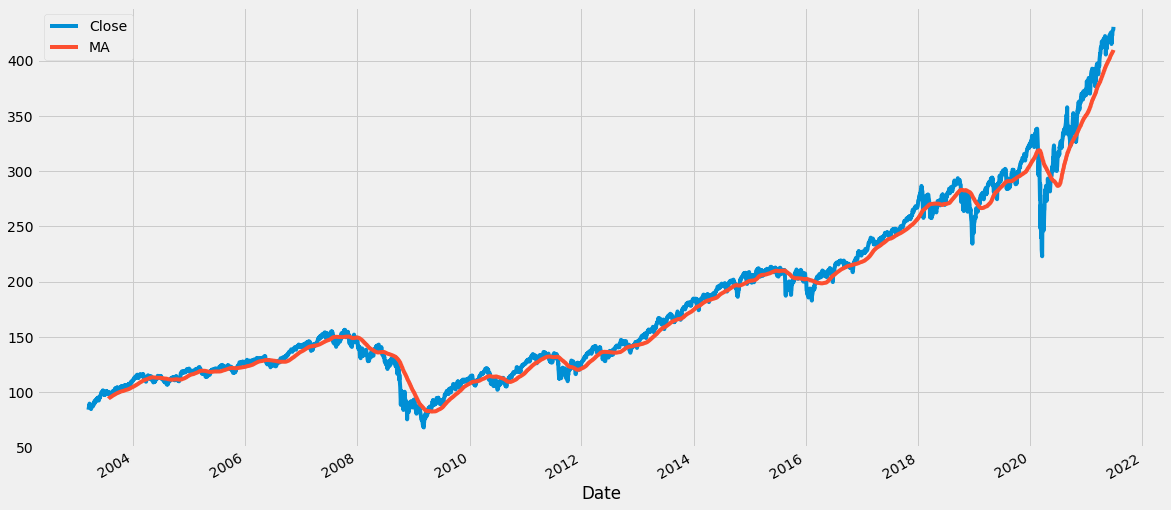

In [10]:
df2['MA'] = df2.rolling(window=90).mean()
df2.plot(figsize=(18,9))